In [1]:
from google.colab import files

uploaded = files.upload()


#  Task 1: Prefix & Suffix Trie for Stemming


class TrieNode:
    def __init__(self):
        self.children = {}
        self.is_end = False
        self.freq = 0  # frequency for branching analysis

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word):
        node = self.root
        for ch in word:
            if ch not in node.children:
                node.children[ch] = TrieNode()
            node = node.children[ch]
            node.freq += 1
        node.is_end = True

    def find_stem_suffix(self, word):
        """
        Find split into stem + suffix based on branching
        """
        node = self.root
        stem = ""
        for i, ch in enumerate(word):
            if ch in node.children:
                node = node.children[ch]
                stem += ch
                # branching point → suffix
                if len(node.children) > 1:
                    return stem, word[i+1:]
        return word, ""


#  Load dataset for Trie (brown_nouns.txt or given dataset)
filename = list(uploaded.keys())[0]

with open(filename, "r") as f:
    words = f.read().lower().split()

#  Build Prefix Trie
prefix_trie = Trie()
for w in words:
    prefix_trie.insert(w)

print("Prefix Trie Stemming Results:")
for w in words[:20]:  # show first 20
    stem, suffix = prefix_trie.find_stem_suffix(w)
    print(f"{w} = {stem}+{suffix}")

#Build Suffix Trie (insert reversed words)
suffix_trie = Trie()
for w in words:
    suffix_trie.insert(w[::-1])  # reverse word

print("\nSuffix Trie Stemming Results:")
for w in words[:20]:
    rev_stem, rev_suffix = suffix_trie.find_stem_suffix(w[::-1])
    print(f"{w} = {rev_stem[::-1]}+{rev_suffix[::-1]}")

Saving brown_nouns.txt to brown_nouns (1).txt
Prefix Trie Stemming Results:
investigation = i+nvestigation
primary = p+rimary
election = e+lection
evidence = e+vidence
irregularities = i+rregularities
place = p+lace
jury = j+ury
presentments = p+resentments
charge = c+harge
election = e+lection
praise = p+raise
thanks = t+hanks
manner = m+anner
election = e+lection
term = t+erm
jury = j+ury
reports = r+eports
irregularities = i+rregularities
primary = p+rimary
handful = h+andful

Suffix Trie Stemming Results:
investigation = n+investigatio
primary = y+primar
election = n+electio
evidence = e+evidenc
irregularities = s+irregularitie
place = e+plac
jury = y+jur
presentments = s+presentment
charge = e+charg
election = n+electio
praise = e+prais
thanks = s+thank
manner = r+manne
election = n+electio
term = m+ter
jury = y+jur
reports = s+report
irregularities = s+irregularitie
primary = y+primar
handful = l+handfu


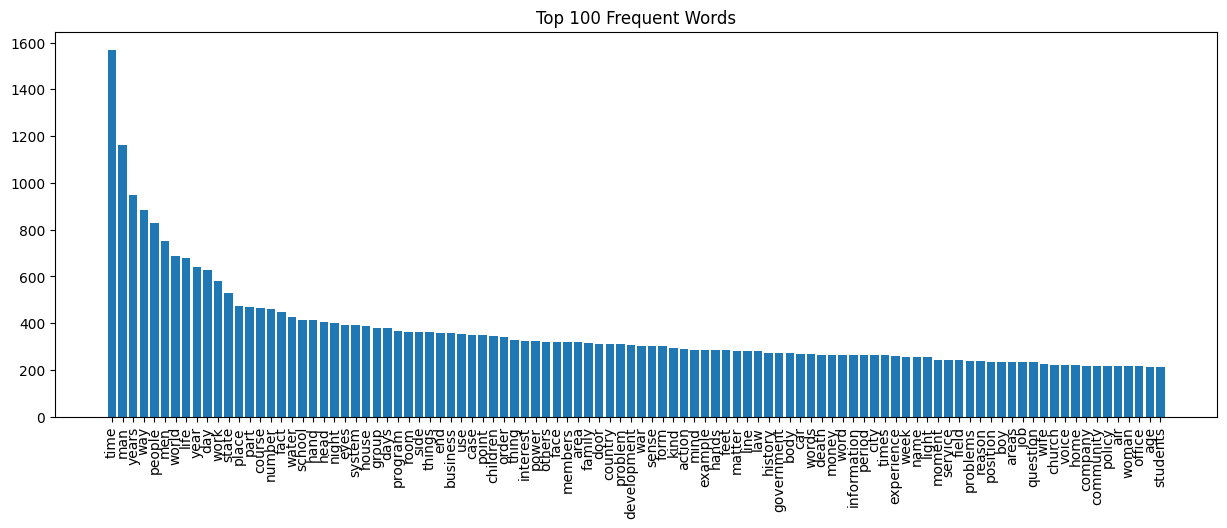

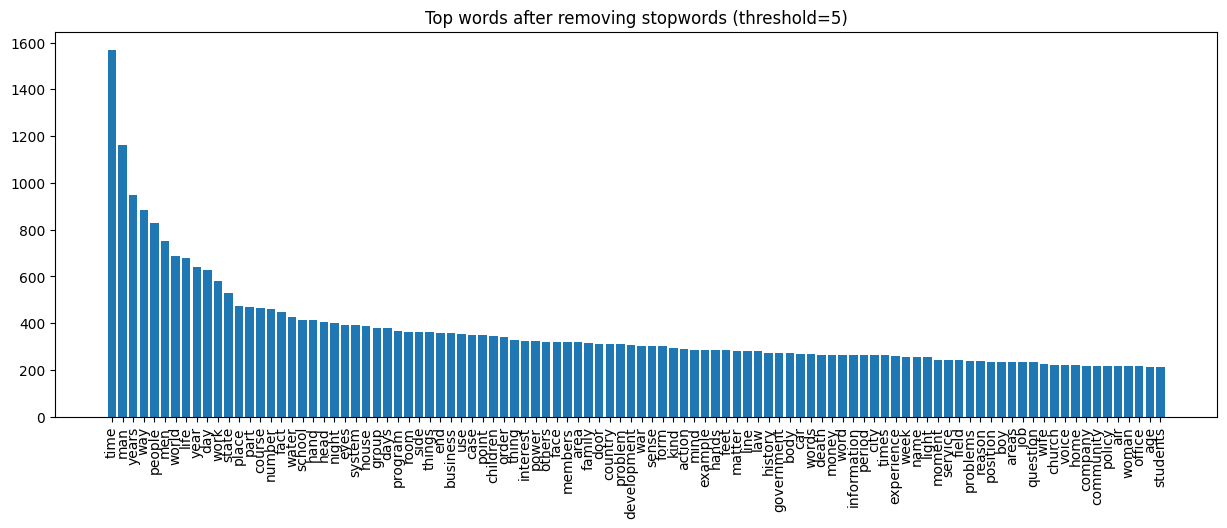

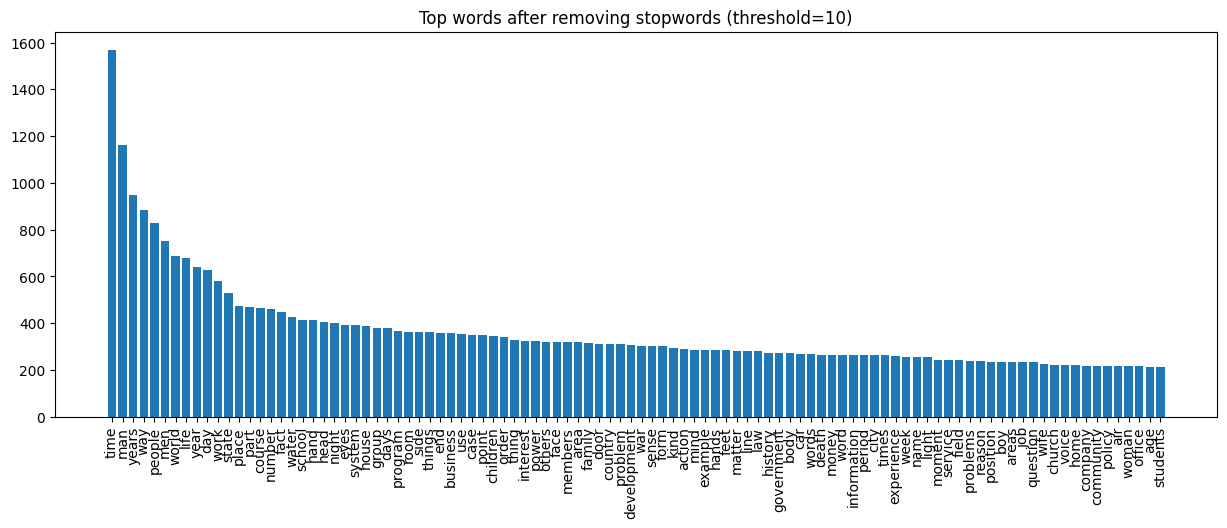

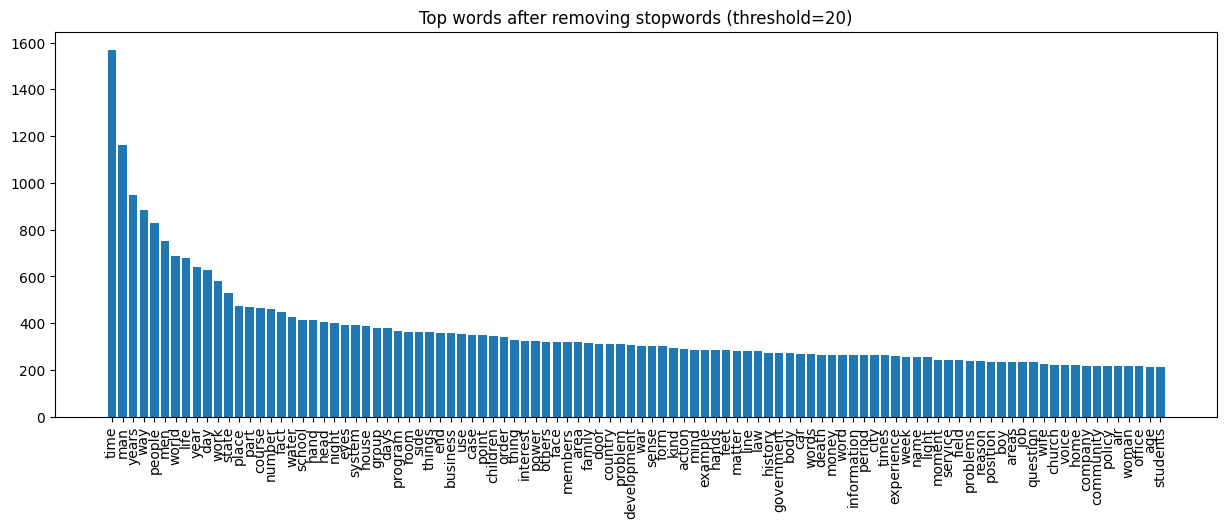

In [2]:


import matplotlib.pyplot as plt

# Frequency dictionary
freq = {}
for w in words:
    freq[w] = freq.get(w, 0) + 1

# Sort by frequency
sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

#  Plot Top 100 words
top_100 = sorted_freq[:100]
plt.figure(figsize=(15,5))
plt.bar([w for w, c in top_100], [c for w, c in top_100])
plt.xticks(rotation=90)
plt.title("Top 100 Frequent Words")
plt.show()

# Stop word removal using frequency threshold
def plot_threshold(threshold):
    filtered = {w:c for w,c in freq.items() if c > threshold}
    sorted_f = sorted(filtered.items(), key=lambda x: x[1], reverse=True)[:100]
    plt.figure(figsize=(15,5))
    plt.bar([w for w,c in sorted_f], [c for w,c in sorted_f])
    plt.xticks(rotation=90)
    plt.title(f"Top words after removing stopwords (threshold={threshold})")
    plt.show()

# Trying three different thresholds
plot_threshold(5)
plot_threshold(10)
plot_threshold(20)